<a href="https://colab.research.google.com/github/sagarbpatel31/Deep-Learning-Basics-to-GANs/blob/master/test_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#CIFAR dataset loading:

(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
np.shape(train_images[0])

(32, 32, 3)

In [4]:
np.shape(train_images[0])

(32, 32, 3)

In [5]:
def image_show(imagedata,labeldata,j):
    class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    plt.figure(figsize=(10,10))
    x=np.squeeze(labeldata)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imagedata[i+j],cmap=plt.cm.binary)
        plt.xlabel(class_names[x[i+j]])
    plt.show()

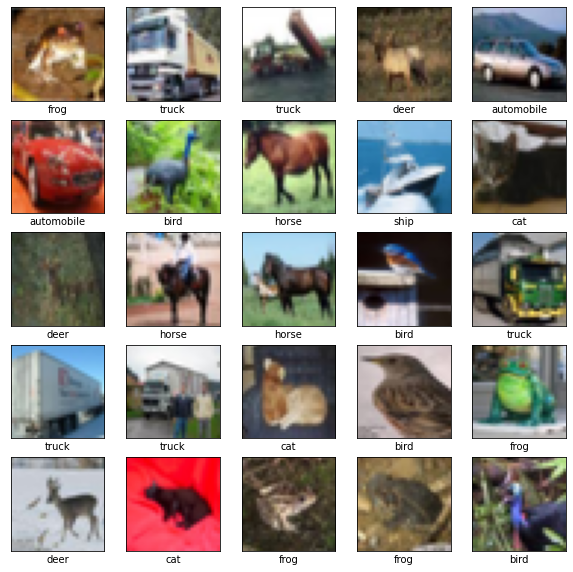

In [6]:
image_show(train_images,train_labels,0)

In [43]:
# Making model with Tensorflow

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 12, 12, 64)       

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [45]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 2s - loss: 6.3867 - accuracy: 0.1018


In [46]:
pred_outs=model.predict(test_images)

In [47]:
pred_labels=np.argmax(pred_outs,axis=1)

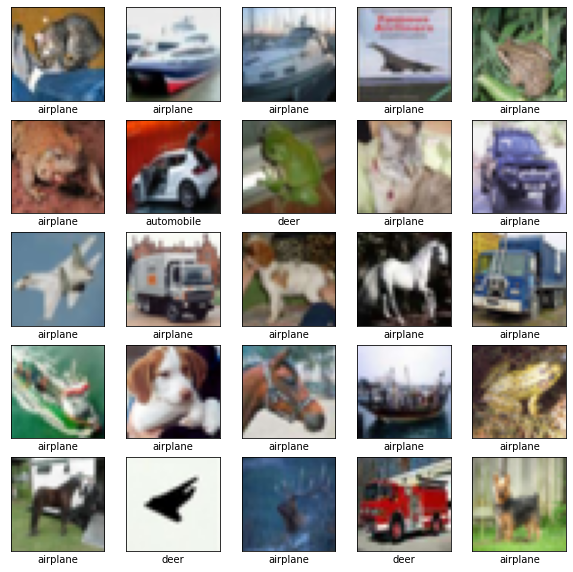

In [48]:
image_show(test_images,pred_labels,0)

In [49]:
model.fit(train_images,train_labels,epochs=5,
         validation_data=(test_images,test_labels))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 19s 12ms/step - loss: 1.4348 - accuracy: 0.4890 - val_loss: 1.3380 - val_accuracy: 0.5398
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9900 - accuracy: 0.6540 - val_loss: 0.9091 - val_accuracy: 0.6808
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8254 - accuracy: 0.7141 - val_loss: 0.7878 - val_accuracy: 0.7254
Epoch 4/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7182 - accuracy: 0.7531 - val_loss: 0.8245 - val_accuracy: 0.7205
Epoch 5/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6384 - accuracy: 0.7821 - val_loss: 0.6920 - val_accuracy: 0.7609


In [50]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.6920 - accuracy: 0.7609
